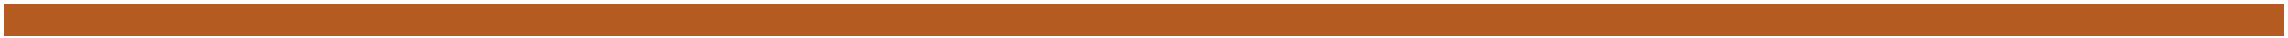

## <font color='#475468'> Footbal Players' Value:</font>
### <font color='#475468'> Can you predict the current value of a football player based on player stats?</font>




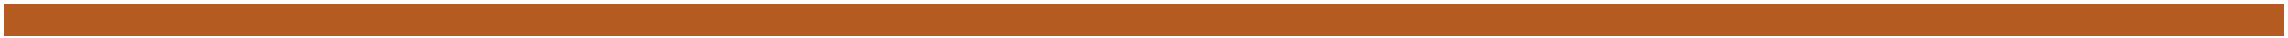

## Initialize

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Load Data

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
player_stats = pd.read_csv('/content/drive/MyDrive/Datasets/footbal_player_stats.csv')

In [42]:
player_stats.head()

,player,team,name,position,height,age,appearance,goals,assists,yellow cards,...,goals conceded,clean sheets,minutes played,days_injured,games_injured,award,current_value,highest_value,position_encoded,winger
0,/david-de-gea/profil/spieler/59377,Manchester United,David de Gea,Goalkeeper,189.0,32.0,104,0.000000,0.000000,0.009585,...,1.217252,0.335463,9390,42,5,13,15000000,70000000,1,0
1,/jack-butland/profil/spieler/128899,Manchester United,Jack Butland,Goalkeeper,196.0,30.0,15,0.000000,0.000000,0.069018,...,1.242331,0.207055,1304,510,58,1,1500000,22000000,1,0
2,/tom-heaton/profil/spieler/34130,Manchester United,Tom Heaton,Goalkeeper,188.0,37.0,4,0.000000,0.000000,0.000000,...,0.616438,0.924658,292,697,84,4,600000,6000000,1,0
3,/lisandro-martinez/profil/spieler/480762,Manchester United,Lisandro Martínez,Defender Centre-Back,175.0,25.0,82,0.028090,0.056180,0.224719,...,0.000000,0.000000,6408,175,22,9,50000000,50000000,2,0
4,/raphael-varane/profil/spieler/164770,Manchester United,Raphaël Varane,Defender Centre-Back,191.0,30.0,63,0.017889,0.017889,0.053667,...,0.000000,0.000000,5031,238,51,21,40000000,80000000,2,0


In [6]:
player_stats.describe(include='all')

,player,team,name,position,height,age,appearance,goals,assists,yellow cards,...,goals conceded,clean sheets,minutes played,days_injured,games_injured,award,current_value,highest_value,position_encoded,winger
count,10754,10754,10754,10754,10754.000000,10754.000000,10754.000000,10754.000000,10754.000000,10754.000000,...,10754.000000,10754.000000,10754.000000,10754.000000,10754.000000,10754.000000,1.075400e+04,1.075400e+04,10754.000000,10754.000000
unique,10754,374,10584,16,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,/david-de-gea/profil/spieler/59377,Daejeon Hana Citizen,Paulinho,Defender Centre-Back,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,46,6,1821,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,181.240353,26.041903,36.407011,0.125554,0.086978,0.189757,...,0.131655,0.044881,2470.789381,117.961689,15.826297,1.960759,3.622971e+06,6.152606e+06,2.713223,0.307513
std,NaN,NaN,NaN,NaN,6.969818,4.777629,26.526541,0.235585,0.143351,0.432388,...,0.442335,0.924437,2021.703271,175.206827,23.383606,3.743936,9.095410e+06,1.338988e+07,0.986356,0.461485
min,NaN,NaN,NaN,NaN,156.000000,15.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,1.000000,0.000000
25%,NaN,NaN,NaN,NaN,176.000000,22.000000,12.000000,0.000000,0.000000,0.053191,...,0.000000,0.000000,660.000000,0.000000,0.000000,0.000000,3.000000e+05,4.500000e+05,2.000000,0.000000
50%,NaN,NaN,NaN,NaN,181.240353,26.000000,35.000000,0.045969,0.040773,0.150250,...,0.000000,0.000000,2101.500000,37.000000,5.000000,1.000000,8.000000e+05,1.500000e+06,3.000000,0.000000
75%,NaN,NaN,NaN,NaN,186.000000,29.000000,59.000000,0.172263,0.133136,0.248276,...,0.000000,0.000000,3968.000000,181.000000,24.000000,2.000000,3.000000e+06,5.000000e+06,4.000000,1.000000


## Fitting a Regression Model to Predict Current Value Of a Football player.

In [16]:
parameters = ['height','age','appearance','goals','assists','yellow cards',
  'goals conceded','clean sheets','minutes played',
  'days_injured','games_injured','award','highest_value',
  'position_encoded', 'winger']

In [17]:
# Assign independent(Y) and dependent(X) variables
X = player_stats.loc[:, parameters]
Y = player_stats.loc[:,['current_value']]

In [18]:
# Fit linear regression model - aka train model
from sklearn import linear_model
regr = linear_model.LinearRegression()
regr.fit(X, Y)

LinearRegression()

In [19]:
# Display regression model
print('Intercept: \n', regr.intercept_)
print('Coefficients: \n', regr.coef_)

Intercept: 
 [5245545.7471418]
Coefficients: 
 [[ 9.95010292e+02 -2.17905592e+05 -5.13338166e+04  7.89423153e+05
   1.14437478e+06  7.26798107e+04 -2.86607112e+05  3.15843740e+04
   1.16521536e+03  4.20461434e+03 -4.93100031e+04 -3.32977863e+05
   6.05773672e-01 -3.19556160e+04 -5.70214769e+04]]


By giving values we are trying to predict a current value of a player.

In [47]:
# Generate new prediction - aka run scoring model
New_Height = 184.0
New_Age = 24
New_Appearance = 73
New_Goals = 0.13
New_Assists = 0.10
New_Yellow_Cards = 0.11
New_goals_conceded =0.15
New_Clean_Sheets = 0.07
New_minutes_played = 2600
New_Days_Injured = 35
New_games_injured = 4
New_Award = 2
New_highest_value = 40000000
New_position_encoded = 3
New_winger = 0.3
print ('Predicted current_value: \n', int(regr.predict([[New_Height ,New_Age ,New_Appearance,New_Goals,New_Assists,New_Yellow_Cards,New_goals_conceded,New_Clean_Sheets, New_minutes_played, New_Days_Injured, New_games_injured, New_Award, New_highest_value, New_position_encoded, New_winger]])))

Predicted current_value: 
 23067301


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
<ipython-input-47-2640081b82bf>:17: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print ('Predicted current_value: \n', int(regr.predict([[New_Height ,New_Age ,New_Appearance,New_Goals,New_Assists,New_Yellow_Cards,New_goals_conceded,New_Clean_Sheets, New_minutes_played, New_Days_Injured, New_games_injured, New_Award, New_highest_value, New_position_encoded, New_winger]])))


utexas_ds_orie_divider_gray.png

#### Histogram of players' current value where the bins cover 150,000 increments

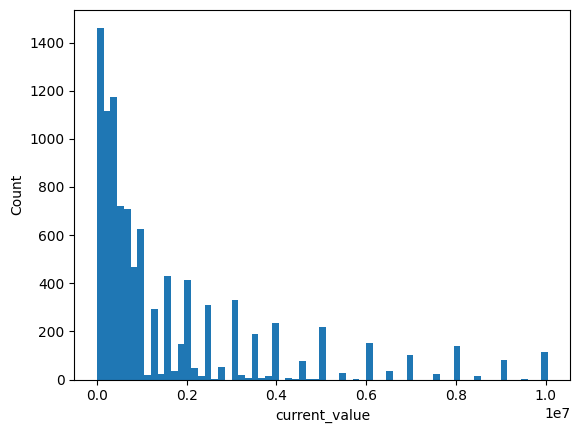

In [62]:
# Set data fields
y = player_stats.loc[:,'current_value']

# Set histogram parameters
binwidth = 150000.0
binrange = np.arange(min(y), 10000000 + binwidth, binwidth)

# Show plot
plt.hist(y, bins=binrange)
plt.xlabel('current_value')
plt.ylabel('Count')
plt.show()

We can see that there are less players with high value.

#### Scatterplot of Minutues Played vs. Current Value

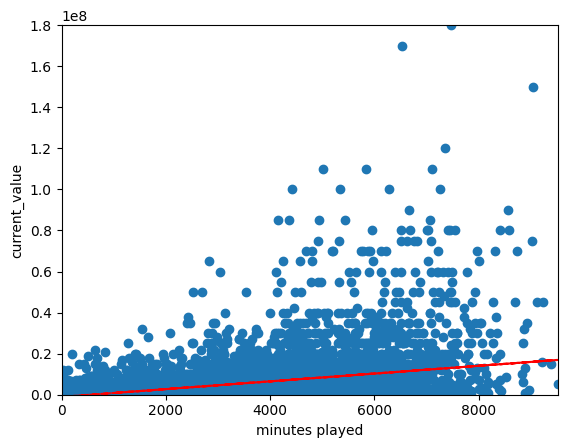

In [35]:
# Set data fields
x = player_stats.loc[:,'minutes played']
y = player_stats.loc[:,'current_value']

# Generate trendline
z = np.polyfit(x, y, 1)
p = np.poly1d(z)

# Show plot
plt.scatter(x, y)
plt.plot(x,p(x),"r--")
plt.xlim(0,np.max(x))
plt.ylim(0,np.max(y))
plt.xlabel('minutes played')
plt.ylabel('current_value')
plt.show()

There is a slight positive correlation between minutes played and the current value of the player. However, it needs further research because I don't think they are independent parameters.

#### Scatterplot of current value vs. goals separated by positions

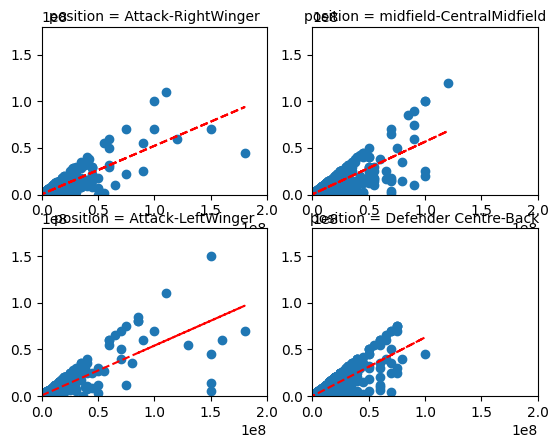

In [64]:
### Matrix of plots
fig, axs = plt.subplots(2, 2)

## Top left plot
x = player_stats.loc[(player_stats['position']=='Attack-RightWinger'),'highest_value']
y = player_stats.loc[(player_stats['position']=='Attack-RightWinger'),'current_value']
z = np.polyfit(x, y, 1)
p = np.poly1d(z)

axs[0, 0].scatter(x,y)
axs[0, 0].plot(x,p(x),"r--")
axs[0, 0].set_xlim(0,np.max(player_stats.loc[:,'highest_value']))
axs[0, 0].set_ylim(0,np.max(player_stats.loc[:,'current_value']))
axs[0, 0].set_xlabel('position = Attack-RightWinger')
axs[0, 0].xaxis.set_label_position("top")


## Top right plot
x = player_stats.loc[(player_stats['position']=='Attack-LeftWinger'),'highest_value']
y = player_stats.loc[(player_stats['position']=='Attack-LeftWinger'),'current_value']
z = np.polyfit(x, y, 1)
p = np.poly1d(z)

axs[1, 0].scatter(x,y)
axs[1, 0].plot(x,p(x),"r--")
axs[1, 0].set_xlim(0,np.max(player_stats.loc[:,'highest_value']))
axs[1, 0].set_ylim(0,np.max(player_stats.loc[:,'current_value']))
axs[1, 0].set_xlabel('position = Attack-LeftWinger')
axs[1, 0].xaxis.set_label_position("top")

## Bottom left plot
x = player_stats.loc[(player_stats['position']=='midfield-CentralMidfield'),'highest_value']
y = player_stats.loc[(player_stats['position']=='midfield-CentralMidfield'),'current_value']
z = np.polyfit(x, y, 1)
p = np.poly1d(z)

axs[0, 1].scatter(x,y)
axs[0, 1].plot(x,p(x),"r--")
axs[0, 1].set_xlim(0,np.max(player_stats.loc[:,'highest_value']))
axs[0, 1].set_ylim(0,np.max(player_stats.loc[:,'current_value']))
axs[0, 1].set_xlabel('position = midfield-CentralMidfield')
axs[0, 1].xaxis.set_label_position("top")

## Bottom right plot
x = player_stats.loc[(player_stats['position']=='Defender Centre-Back'),'highest_value']
y = player_stats.loc[(player_stats['position']=='Defender Centre-Back'),'current_value']
z = np.polyfit(x, y, 1)
p = np.poly1d(z)

axs[1, 1].scatter(x,y)
axs[1, 1].plot(x,p(x),"r--")
axs[1, 1].set_xlim(0,np.max(player_stats.loc[:,'highest_value']))
axs[1, 1].set_ylim(0,np.max(player_stats.loc[:,'current_value']))
axs[1, 1].set_xlabel('position = Defender Centre-Back')
axs[1, 1].xaxis.set_label_position("top")


There is a strong correlation between the highest value and the current value of the players

## Takeaways

- We can play with parameters in the code and try to find other relations as we have done in this assignment.

- We can try to find data of other current players and test the reliability of our regression model.

